In [86]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
from utils.track_reconstruction_metric_triplet_level  import*
from utils.track_reconstruction_metric_hit_level  import*
from importlib import reload
import yaml
import json

from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*
class generated_tracks:
    pass

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:
    pdg_dict = pickle.load(f)
with open("config.yaml", "r") as f:

    # Load and parse the YAML file
    config = yaml.safe_load(f)
barrel_data = get_barrel_data(config)
config['sigma_cut'] = 3
layer_files = ['z0','dtheta','dkappa']
get_layer_wise_data(layer_files,config)
def fname(sigma_cut,eno):

    stage_dir = f'/mnt/data1/gupta/ca/{sigma_cut}' +'sigma/final_config/'

    triplet_arr_fname = stage_dir+f'triplets/triplet_arr{eno}.pkl'
    triplet_df_fname = stage_dir+f'triplets/triplet_df{eno}.pkl'
    ca_fname = stage_dir+f'ca_class/chi2_{eno}.pkl'
    # triplet_fname = stage_dir+f'{track_segments}_eventno_'+str(eno)+'_signal_'+str(signal)+'_z0_'+str(z0)+'_pt_'+str(pt)+'.pkl'
    return triplet_arr_fname,triplet_df_fname,ca_fname


In [87]:
hdf,pdf = read_files(0)

signal_df = get_signal(hdf,pdf,config)
hits_df = load_barrel_df(hdf)


signal_pids = signal_df['particle_id'].unique()




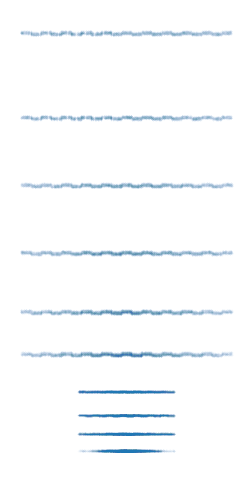

In [129]:
# plt.scatter(hits_df.z,hits_df.r)
##decorate above plot scientifically with grid and all

plt.figure(figsize = (3,6))
plt.scatter(hits_df.z,hits_df.r,alpha=0.03,s = .1,label = 'all hits')
# plt.scatter(signal_df.z,signal_df.r,alpha=0.3,s = 3,label = 'signal hits')
##tuurn off axis
plt.axis('off')
# plt.legend()

plt.show()

In [89]:
##plot doublets

doublet_array = make_all_doublets(signal_df,barrel_data,config)
len(doublet_array)


2979

In [90]:
signal_df = add_barrel_numbers(signal_df,barrel_data)
signal_df

hit_id         particle_id        tx         ty         tz       tpx  \
0      18883  644018869882585088  -30.7420   -7.33237   -81.7948 -1.464760   
1      18905    9013177849217024  -32.0143   -3.69342   -82.2344 -1.585470   
2      18929    9018812846309376  -31.0766   -6.37516   -76.5716 -1.403620   
3      18963    9018744126832640  -23.2440  -21.17180   -81.2013 -0.875288   
4      18964   58574695263371264  -21.5312  -23.08930   -79.1523 -0.778378   
...      ...                 ...       ...        ...        ...       ...   
3471  122642  121600282315456512 -341.4940  961.14900  1040.3400 -0.291553   
3472  122645  977284417674280960 -471.7600  906.80500  1052.7900 -0.872950   
3473  122661  166638065295556608 -731.1240  711.81500  1071.2200 -1.493060   
3474  122678  243198365607657472 -993.7980  233.81700  1035.7400 -1.160680   
3475  122679  270217145873334272 -996.9860  225.77200  1029.3400 -1.360890   

           tpy       tpz    weight         x          y          z  volume_id  \
0    -0.359156 -1.122550  0.000033  -30.7388   -7.34129   -81.7927          8   
1    -0.173213 -0.724506  0.000040  -32.0110   -3.70269   -82.2304          8   
2    -0.278550 -0.405855  0.000025  -31.0754   -6.37871   -76.5656          8   
3    -0.785261 -0.509405  0.000028  -23.2395  -21.17680   -81.2035          8   
4    -0.861183 -0.611428  0.000028  -21.5408  -23.07860   -79.1504          8   
...        ...       ...       ...       ...        ...        ...        ...   
3471  1.699280  1.536660  0.000021 -341.4970  961.14900  1035.4000         17   
3472  2.316260  2.510460  0.000031 -471.7470  906.80900  1057.0000         17   
3473  1.049880  1.803290  0.000030 -731.1180  711.82000  1067.8000         17   
3474  0.575427  1.362630  0.000018 -993.7880  233.84100  1035.4000         17   
3475  0.613257  1.461960  0.000021 -996.9940  225.75300  1024.6000         17   

      layer_id  module_id  module_index  region  cell_count  cell_val  \
0            2         81           836     3.0         4.0  0.197463   
1            2         81           836     3.0         3.0  0.159278   
2            2         81           836     3.0         2.0  0.170363   
3            2         82           837     3.0         2.0  0.162083   
4            2         82           837     3.0         3.0  0.171956   
...        ...        ...           ...     ...         ...       ...   
3471         4       3163         18110     4.0         1.0  1.000000   
3472         4       3166         18113     4.0         1.0  1.000000   
3473         4       3174         18121     4.0         1.0  1.000000   
3474         4       3187         18134     4.0         2.0  2.000000   
3475         4       3187         18134     4.0         1.0  1.000000   

          leta      lphi    lx        ly   lz      geta      gphi  \
0     1.210965  1.035841  0.10   0.16875  0.3  0.511091 -2.483493   
1     1.440542  0.844154  0.10   0.11250  0.3  0.348650 -2.483493   
2     1.689017  0.512389  0.10   0.05625  0.3  0.176953 -2.483493   
3     1.623512  1.152572  0.05   0.11250  0.3  0.361943 -2.247396   
4     1.303115  1.282741  0.05   0.16875  0.3  0.529723 -2.247396   
...        ...       ...   ...       ...  ...       ...       ...   
3471  0.064766  1.559686  0.12  10.80000  0.7  3.415966  1.941937   
3472  0.064766  1.559686  0.12  10.80000  0.7  3.415965  2.065947   
3473  0.064766  1.559686  0.12  10.80000  0.7  3.415965  2.396641   
3474  0.064754  1.548578  0.24  10.80000  0.7  3.374970  3.094538   
3475  0.064766  1.559686  0.12  10.80000  0.7  3.415965  2.934019   

                r       phi  barrel_layers  
0       31.603297 -2.907156            0.0  
1       32.224432 -3.026435            0.0  
2       31.723310 -2.939139            0.0  
3       31.440916 -2.402601            0.0  
4       31.569413 -2.321743            0.0  
...           ...       ...            ...  
3471  1020.013530  1.912186            9.0  
3472  1022.177966  2.050495   

100%|██████████| 2979/2979 [00:54<00:00, 54.66it/s]


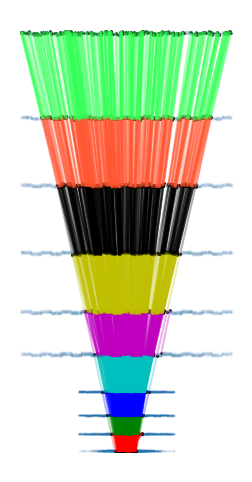

In [95]:
plt.figure(figsize = (3,6))
c_arr = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57']

plt.scatter(hits_df.z,hits_df.r,alpha=0.03,s = .1,label = 'all hits')
# plt.scatter(signal_df.z,signal_df.r,alpha=0.3,s = 3,label = 'signal hits')
for d in tqdm(doublet_array):

    ## r and z for doublet hits

    for iter in range(d.connected_hits_pos.shape[1]):
        coordinates = d.connected_hits_pos[:,iter]
        r = [d.hit1_pos[0],coordinates[0]]
        z = [d.hit1_pos[2],coordinates[2]]
        color_id = signal_df[signal_df.hit_id ==d.hit1_id].barrel_layers.values[0]



        
        plt.plot(z,r,
                 alpha = 0.3,c = c_arr[int(color_id)])
        plt.scatter(z,r,s = 0.5,c = 'k')

plt.axis('off')
plt.show()

In [96]:
triplet_array,triplet_df = make_triplets(doublet_array,signal_df,hits_df,config,barrel_data) 



100%|██████████| 3725/3725 [00:28<00:00, 129.50it/s]


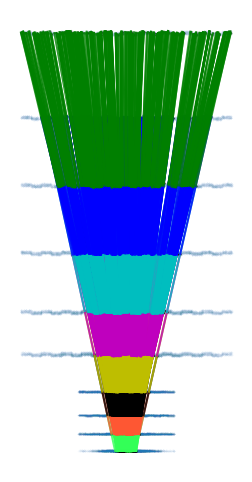

In [109]:
plt.figure(figsize = (3,6))
c_arr = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57']
c_arr.reverse()

plt.scatter(hits_df.z,hits_df.r,alpha=0.03,s = .1,label = 'all hits')

for trip in tqdm(triplet_array):


    trip_df = signal_df[signal_df.hit_id.isin(trip.hitids)]
    color_id = trip_df.barrel_layers.values[0]

    r = trip_df.r
    z = trip_df.z
    plt.scatter(z,r,c = 'k',s = 0.5,alpha = 0.3)

    plt.plot(z,r,color = c_arr[int(color_id)],alpha = 0.8)
plt.axis('off')
plt.show()    

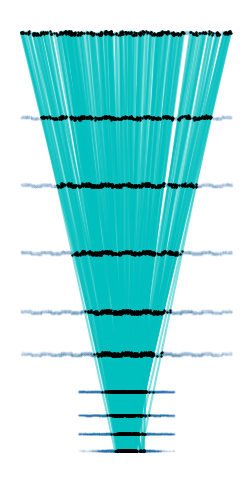

In [128]:
plt.figure(figsize = (3,6))
c_arr = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57']
c_arr.reverse()

plt.scatter(hits_df.z,hits_df.r,alpha=0.03,s = .1,label = 'all hits')
for pid in signal_pids:


    df = signal_df[signal_df.particle_id == pid]

    plt.scatter(df.z,df.r,c = 'k',zorder = 2,s = 0.5)   
    plt.plot(df.z,df.r,color =c_arr[5],zorder = 1,alpha = 0.5)
plt.axis('off')
plt.show()


In [ ]:

from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from scipy.stats import norm


pd.set_option('display.max_columns', None) 


with open("config.yaml", "r") as f:

    # Load and parse the YAML file
    config = yaml.safe_load(f)



barrel_data = get_barrel_data(config)

def z_intersept(z1,r1,z2,r2):
    if (z2-z1) :
            
        z0 = (r1*z2-r2*z1)/(r1-r2)
        return z0
    else: return 0


layer_wise_z0 = {i:[] for i in range(9)}
for eno in tqdm(range(90)):
    hdf,pdf = read_files(eno)


    signal_df = get_signal(hdf,pdf,config)
    pids = signal_df.particle_id.unique()

    for pid in pids:
        pdf = signal_df[signal_df.particle_id == pid]
        barrel_info = pdf.barrel_layers.unique()
        for i in range(9):
            if(sum(barrel_info==i) != 0 and sum (barrel_info==i+1) != 0):
                barrel_i = pdf[pdf.barrel_layers == i]
                barrel_i1 = pdf[pdf.barrel_layers == i+1]

                r1 = barrel_i.r.mean()
                z1 = barrel_i.z.mean()

                r2 = barrel_i1.r.mean()
                z2 = barrel_i1.z.mean()

                z0 = z_intersept(z1,r1,z2,r2)
                layer_wise_z0[i].append(z0) 


save_dict_as_json(layer_wise_z0,'control_data/layer_wise_z0.json')


In [2]:
json_file = 'control_data/layer_wise_z0.json'
with open(json_file) as f:
    layer_wise_z0 = json.load(f)

In [17]:
config['z0']

[(-219.5594880866201, 221.76328804374026),
 (-219.728696932703, 221.90094855241196),
 (-219.85206678288512, 221.9855602983003),
 (-220.03509603849463, 222.207221665349),
 (-220.60800724219374, 222.88177725241653),
 (-219.63401857360353, 221.8348354789508),
 (-221.68575620154039, 223.8628901312343),
 (-229.94560886918728, 232.02896796701313),
 (-243.13347240561075, 244.14888080992165)]

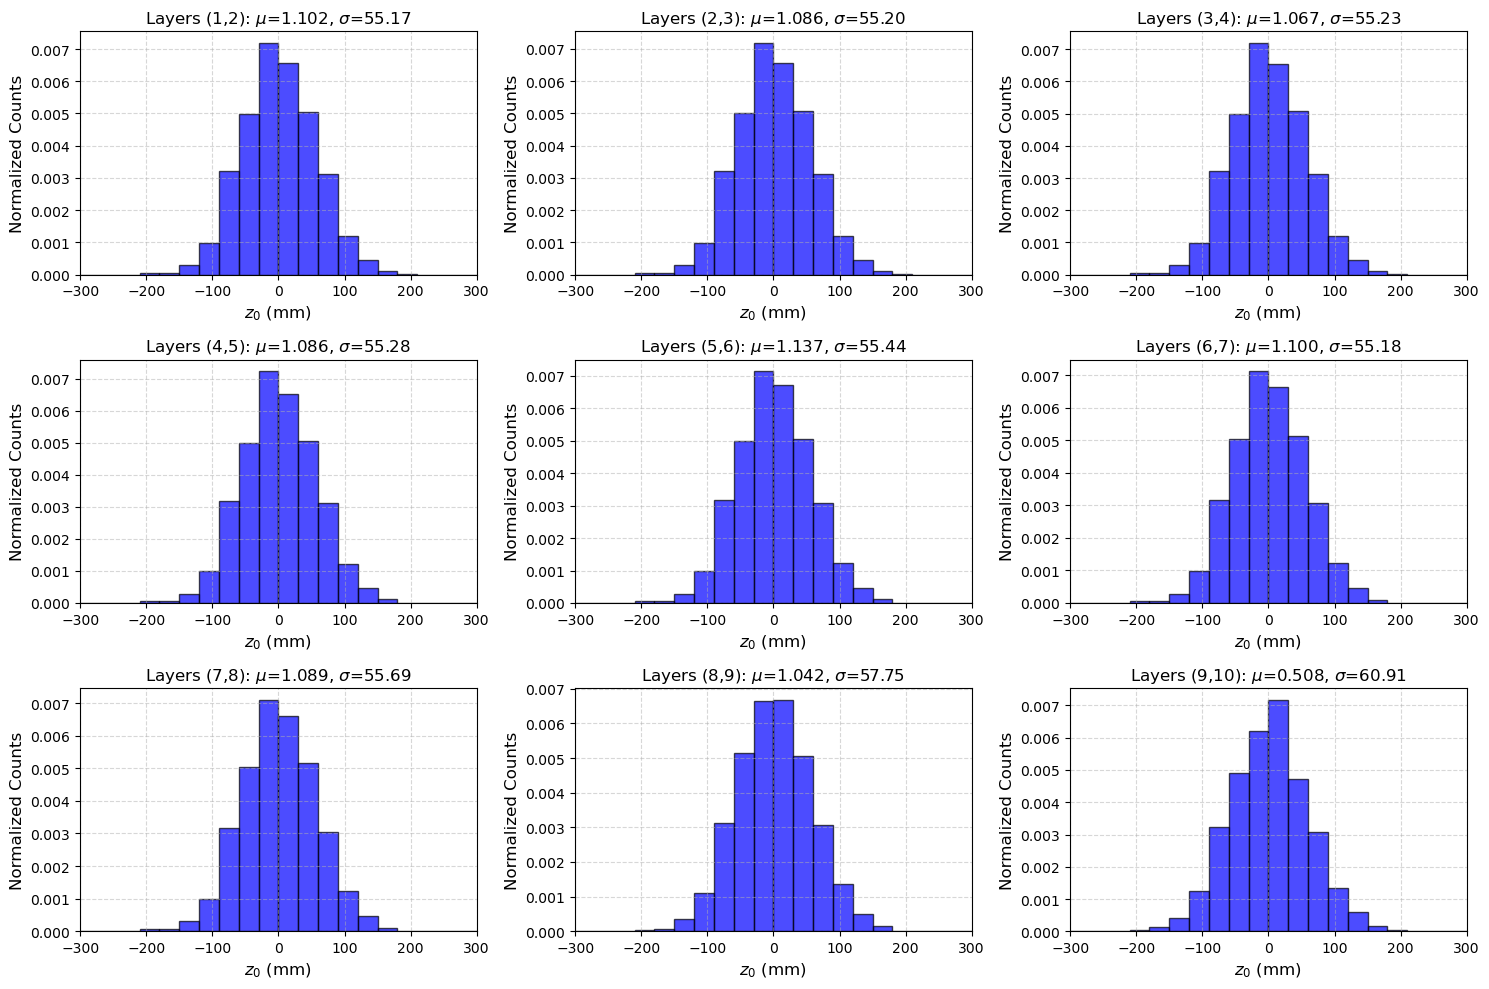

In [28]:
# Set up the 3x3 grid for the histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the grid for easier iteration

# Plot a histogram for each key in layer_wise_z0
for i, (key, values) in enumerate(layer_wise_z0.items()):
    mu,sigma = norm.fit(values)
    axes[i].hist(values, bins=20, range = (-300,300),density = True,color='blue', edgecolor='black',alpha = 0.7)
    axes[i].set_title(f'Layers ({i+1},{i+2}): $\mu$={mu:.3f}, $\sigma$={sigma:.2f}', fontsize=12)

    axes[i].set_xlabel(r'$z_0$ (mm)',fontsize=12)
    axes[i].set_ylabel("Normalized Counts",fontsize=12)
    axes[i].set_xlim(-300,300)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (if any)
# for j in range(i + 1, 9):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('layer_wise_z0.png',dpi = 350)
plt.show()

In [10]:
triplet_fname,triplet_df_fname,ca_fname = fname(4,0)
with open(triplet_fname,'rb') as f:
    triplet_arr = pickle.load(f)
with open(triplet_df_fname,'rb') as f:
    triplet_df = pickle.load(f)


In [13]:
hdf,pdf = read_files(0)
hits_df = load_barrel_df(hdf)
signal_df = get_signal(hdf,pdf,config)


AttributeError: Can't get attribute 'generated_tracks' on <module '__main__'>

(8, 4)

# Doublet Results

In [32]:
json_file = 'control_data/doublet_cuts/doublet_cut_pt_0.4_sigma_varry.py'
with open(json_file) as f:
    metric = json.load(f)



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

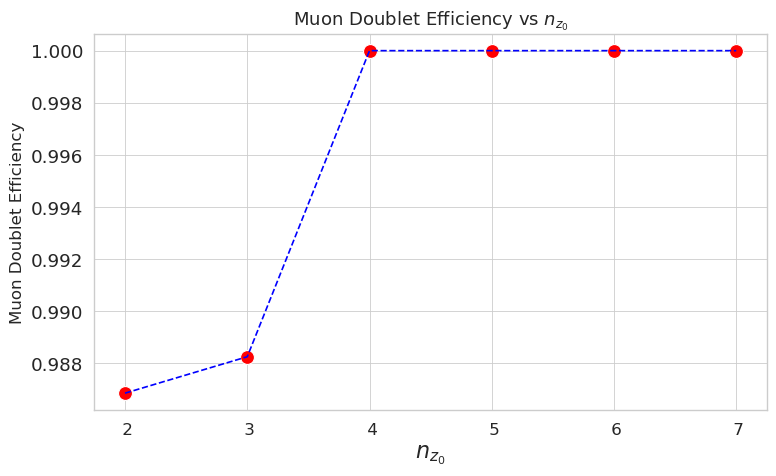

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming metric is defined like this:
# metric = {
#     '2': [efficiency_1, efficiency_2, ...],
#     '3': [efficiency_1, efficiency_2, ...],
#     '4': [efficiency_1, efficiency_2, ...],
#     '5': [efficiency_1, efficiency_2, ...],
#     '6': [efficiency_1, efficiency_2, ...],
#     '7': [efficiency_1, efficiency_2, ...],
# }

# Calculate means for each key
keys = sorted(metric.keys(), key=int)
means = [sum(metric[key]) / len(metric[key]) for key in keys]

# Set up a scientific style plot with Seaborn
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=keys, y=means, color='red', s=100, )
plt.plot(keys, means, linestyle='--', color='blue', label='Dashed Trend')

# Customizing plot with labels and title
plt.xticks(ticks=range(len(keys)), labels=[f" {key}" for key in keys], fontsize=12)
plt.ylabel('Muon Doublet Efficiency', fontsize=12)
plt.xlabel('$n_{z_0}$', fontsize=16)
plt.title(r'Muon Doublet Efficiency vs $n_{z_0}$', fontsize=13)

# Add grid for scientific clarity
plt.grid(True, which='both', linestyle='-', linewidth=0.6)

# Tight layout and show plot
plt.tight_layout()
plt.savefig('thesis_plots/muon_doublet_efficiency_vs_nz0.png',dpi = 300)
plt.show()


In [12]:
###this is for differential study for muons only ...keeping pt fixed and varrying sigma_cut

from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
# from utils.track_reconstruction_metric  import*
from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:

    pdg_dict = pickle.load(f)

sigma_cut = [2,3,4,5,6,7]

event_name = 'event_array.pkl'
with open(event_name,'rb') as f:
    event_array = pickle.load(f)


# metric = {i:[] for i in sigma_cut}
# total_muons = 0
# for sigma in sigma_cut:
        
#     with open("config.yaml", "r") as f:

#         # Load and parse the YAML file
#         config = yaml.safe_load(f)
#     config['pt'] = 0.5
#     config['sigma_cut_doublets'] = sigma


#     barrel_data = get_barrel_data(config)

#     layer_files = ['z0','dtheta','dkappa']
 
#     get_layer_wise_data(layer_files,config)
signal_doublets = 0

for eno in tqdm(event_array):
    hdf,pdf = read_files(eno)

    signal_df = get_signal(hdf,pdf,config)

    if(config['signal']):
        hits_df = signal_df
    else:
        hits_df = load_barrel_df(hdf)


    total_signal_pids = signal_df['particle_id'].unique()

    ##getting particle type from pdf dataframe
    particle_signal_df = pdf[pdf.particle_id.isin(total_signal_pids)]
    pdg_pdf = particle_signal_df[particle_signal_df['particle_type'].isin([-13,13])]

    pdg_pids = pdg_pdf['particle_id'].unique()



    pdg_df = signal_df[signal_df['particle_id'].isin(pdg_pids)]
    if(len(pdg_df)):
  
        ss = total_signal_doublets(pdg_df,barrel_data)
        # values = eff_and_pur(doublet_array,signal_df,barrel_data)
        signal_doublets += ss
        
    
print(signal_doublets)

  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:28<00:00,  1.79it/s]

862


In [23]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*

from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:

    pdg_dict = pickle.load(f)

PT  = [0.4,0.5,0.6,0.7,0.8,0.9,1.0]
metric = {i:[] for i in PT}
total_muons = 0
event_name = 'event_array.pkl'
with open(event_name,'rb') as f:
    event_array = pickle.load(f)

def eandp(reco_doublet_arr,signal_df,barrel_data):
    signal_truth = 0
    total_doublets = 0
    
    pid = signal_df.particle_id.unique()
    for doublets in reco_doublet_arr:
        true_doublets = sum(doublets.labels)
      
        if(true_doublets):

            if(np.isin(doublets.pid1,pid)):
               signal_truth += true_doublets

        total_doublets += len(doublets.labels)

    pur = signal_truth/total_doublets 
    signal_doublets = total_signal_doublets(signal_df,barrel_data)

    eff = signal_truth/signal_doublets

    return signal_truth,signal_doublets

eff2 = []


for pt in PT:
    muon_reco = 0
    muon_truth = 0
        
    with open("config.yaml", "r") as f:

        # Load and parse the YAML file
        config = yaml.safe_load(f)
    config['pt'] = pt    
    barrel_data = get_barrel_data(config)

    layer_files = ['z0','dtheta','dkappa']
 
    get_layer_wise_data(layer_files,config)


    for eno in tqdm(event_array):
        hdf,pdf = read_files(eno)

        signal_df = get_signal(hdf,pdf,config)

        if(config['signal']):
            hits_df = signal_df
        else:
            hits_df = load_barrel_df(hdf)


        total_signal_pids = signal_df['particle_id'].unique()

        ##getting particle type from pdf dataframe
        particle_signal_df = pdf[pdf.particle_id.isin(total_signal_pids)]
        pdg_pdf = particle_signal_df[particle_signal_df['particle_type'].isin([-13,13])]

        pdg_pids = pdg_pdf['particle_id'].unique()



        pdg_df = signal_df[signal_df['particle_id'].isin(pdg_pids)]
        if(len(pdg_df)):
            doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            signal_truth,signal_doublet = eandp(doublet_array,pdg_df,barrel_data)

            muon_reco = muon_reco + signal_truth
            muon_truth = muon_truth + signal_doublet
    e = muon_reco/muon_truth
    eff2.append(e)    
        


100%|██████████| 51/51 [00:19<00:00,  2.67it/s]


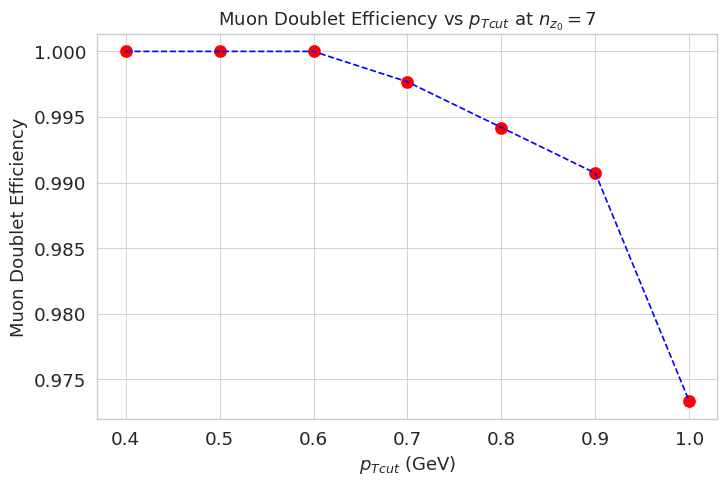

In [25]:
# Assuming PT and eff are defined appropriately
# PT = [list of PT values]
# eff = [list of corresponding efficiency values]
import matplotlib.pyplot as plt
import seaborn as sns


# Set up a scientific style plot with Seaborn
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=PT, y=eff2, color='red', s=100)  # Scatterplot of PT vs eff
plt.plot(PT, eff2, linestyle='--', color='blue', label='Dashed Trend')  # Line plot of PT vs eff

# Customizing plot with labels and title

plt.ylabel('Muon Doublet Efficiency', fontsize=13)
plt.xlabel('$p_{Tcut}$ (GeV)', fontsize=13)  # Update xlabel for PT
plt.title(r'Muon Doublet Efficiency vs $p_{Tcut}$ at $n_{z_0} = 7$', fontsize=13)  # Update title for PT

# Add grid for scientific clarity
plt.grid(True, which='both', linestyle='-', linewidth=0.6)

# Tight layout and show plot
# plt.tight_layout()
plt.savefig('thesis_plots/muon_doublet_efficiency_vs_PT.png', dpi=300)
plt.show()


In [35]:
# Assuming PT and eff are defined appropriately
# PT = [list of PT values]
# eff = [list of corresponding efficiency values]
import matplotlib.pyplot as plt
import seaborn as sns


# Set up a scientific style plot with Seaborn
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sigma_cut, y=eff, color='red', s=100)  # Scatterplot of PT vs eff
plt.plot(sigma_cut, eff, linestyle='--', color='blue', label='Dashed Trend')  # Line plot of PT vs eff

# Customizing plot with labels and title

plt.ylabel('Muon Doublet Efficiency', fontsize=13)
plt.xlabel('$n_{z_0}$', fontsize=13)  # Update xlabel for PT
plt.title(r'Muon Doublet Efficiency vs $n_{z_0}$ at $p_{Tcut} = 0.4$ GeV', fontsize=13)  # Update title for PT

# Add grid for scientific clarity
plt.grid(True, which='both', linestyle='-', linewidth=0.6)

# Tight layout and show plot
# plt.tight_layout()
plt.savefig('thesis_plots/muon_doublet_efficiency_vs_nz0.png', dpi=300)
plt.show()


In [56]:
doublet_metric_name = '/mnt/data1/gupta/ca/4sigma/doublet_metrics.json'
with open(doublet_metric_name) as f:
    metric = json.load(f)
    

In [59]:
metric.keys()

dict_keys(['eff', 'pur', 'total_segments', 'signal_segments'])

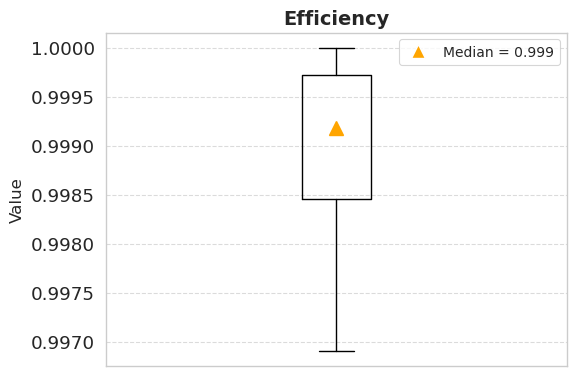

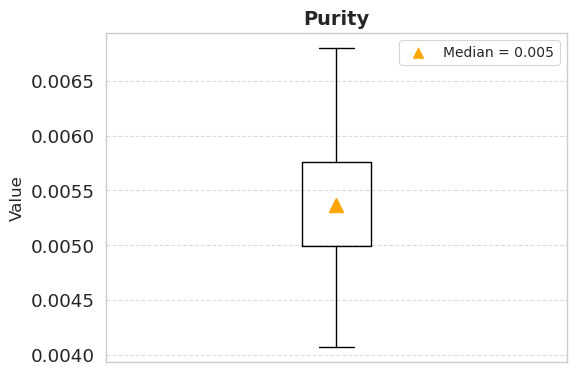

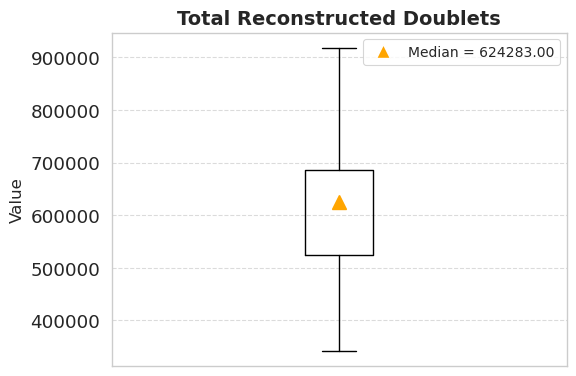

In [60]:
# New labels for each plot
titles = ['Efficiency', 'Purity', 'Total Reconstructed Doublets', 'Signal Doublets']

# Create individual boxplots for each metric
for i, (key, values) in enumerate(metric.items()):
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    
    # Create the boxplot
    box = plt.boxplot(values, showfliers=False,
                whiskerprops={'linestyle': '-', 'color': 'black'},
                boxprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'visible': False})  # Ensure the median line is not visible

    median_value = np.median(values)  # Calculate the median
    # Format the median value based on the index
    if i < 2:
        median_label = f'Median = {median_value:.3f}'  # For the first two plots
    else:
        median_label = f'Median = {median_value:.2f}'  # For the last two plots

    plt.plot(1, median_value, marker='^', markersize=10, color='orange')  # Plot median with triangle

    plt.title(titles[i], fontsize=14, fontweight='bold')  # Set the title with enhanced font
    plt.ylabel('Value', fontsize=12)  # Add a y-axis label for clarity
    plt.xticks([])  # Remove x-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for y-axis only for better readability
    
    # Add a single legend for the median
    plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
               [median_label], loc='upper right', fontsize=10)

    plt.tight_layout()  # Adjust the layout to avoid overlap
    plt.show()


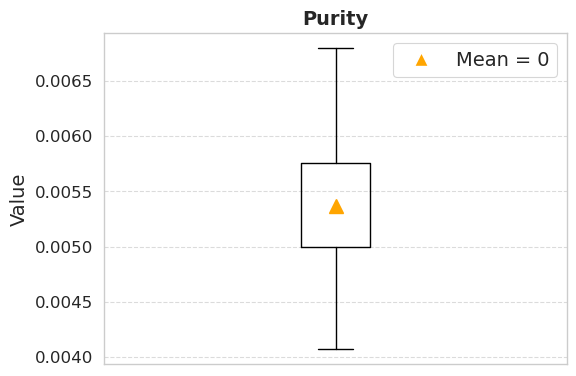

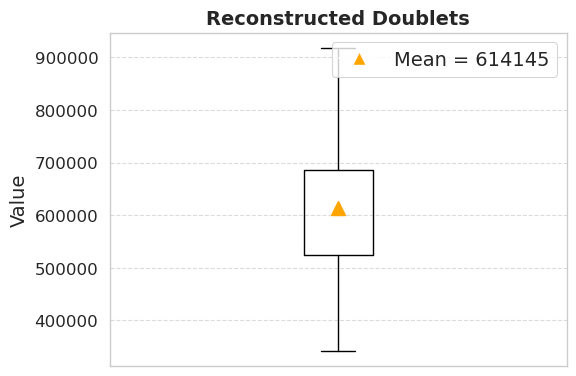

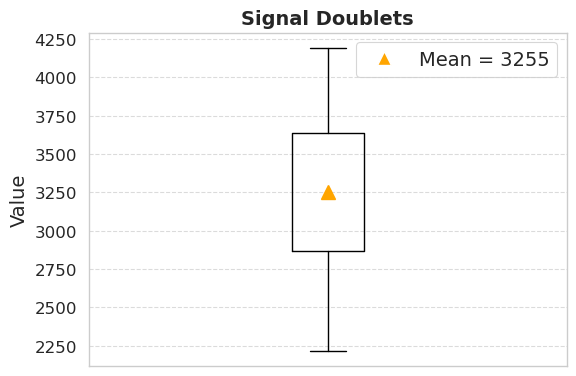

In [61]:
import os

# New labels for each plot
titles = ['Efficiency', 'Purity', 'Reconstructed Doublets', 'Signal Doublets']

# Create the output directory if it doesn't exist
output_dir = 'thesis_plots/doublet_metric/'
os.makedirs(output_dir, exist_ok=True)

# Create individual boxplots for each metric
for i, (key, values) in enumerate(metric.items()):
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    
    # Create the boxplot
    plt.boxplot(values, showfliers=False,
                whiskerprops={'linestyle': '-', 'color': 'black'},
                boxprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'visible': False})  # Hide the median line

    mean_value = np.mean(values)  # Calculate the mean
    plt.plot(1, mean_value, marker='^', markersize=10, color='orange')  # Plot mean with triangle

    plt.title(titles[i], fontsize=14, fontweight='bold')  # Set the title with enhanced font
    plt.ylabel('Value', fontsize=14)  # Add a y-axis label for clarity
    plt.xticks([])  # Remove x-axis ticks
    ##y ticks size to 12
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for y-axis only for better readability

         # Add a single legend for the mean
    if i in [0,1]:

        plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
                [f'Mean = {mean_value:.0f}'], loc='upper right', fontsize=14)
    else:
        plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
    [f'Mean = {mean_value:.0f}'], loc='upper right', fontsize=14)


    plt.tight_layout()  # Adjust the layout to avoid overlap
    
    # Save the figure
    file_path = os.path.join(output_dir, f'doublet_{titles[i].replace(" ", "_").lower()}.png')  # Format file name
    plt.savefig(file_path, dpi=150)  # Save with 150 DPI
    plt.show()


In [ ]:
'trip_bef'

# Triplet Cut

In [2]:
json_file = 'control_data/layer_wise_dtheta.json'
with open(json_file) as f:
    metric = json.load(f)

0
1
2
3
4
5
6
7


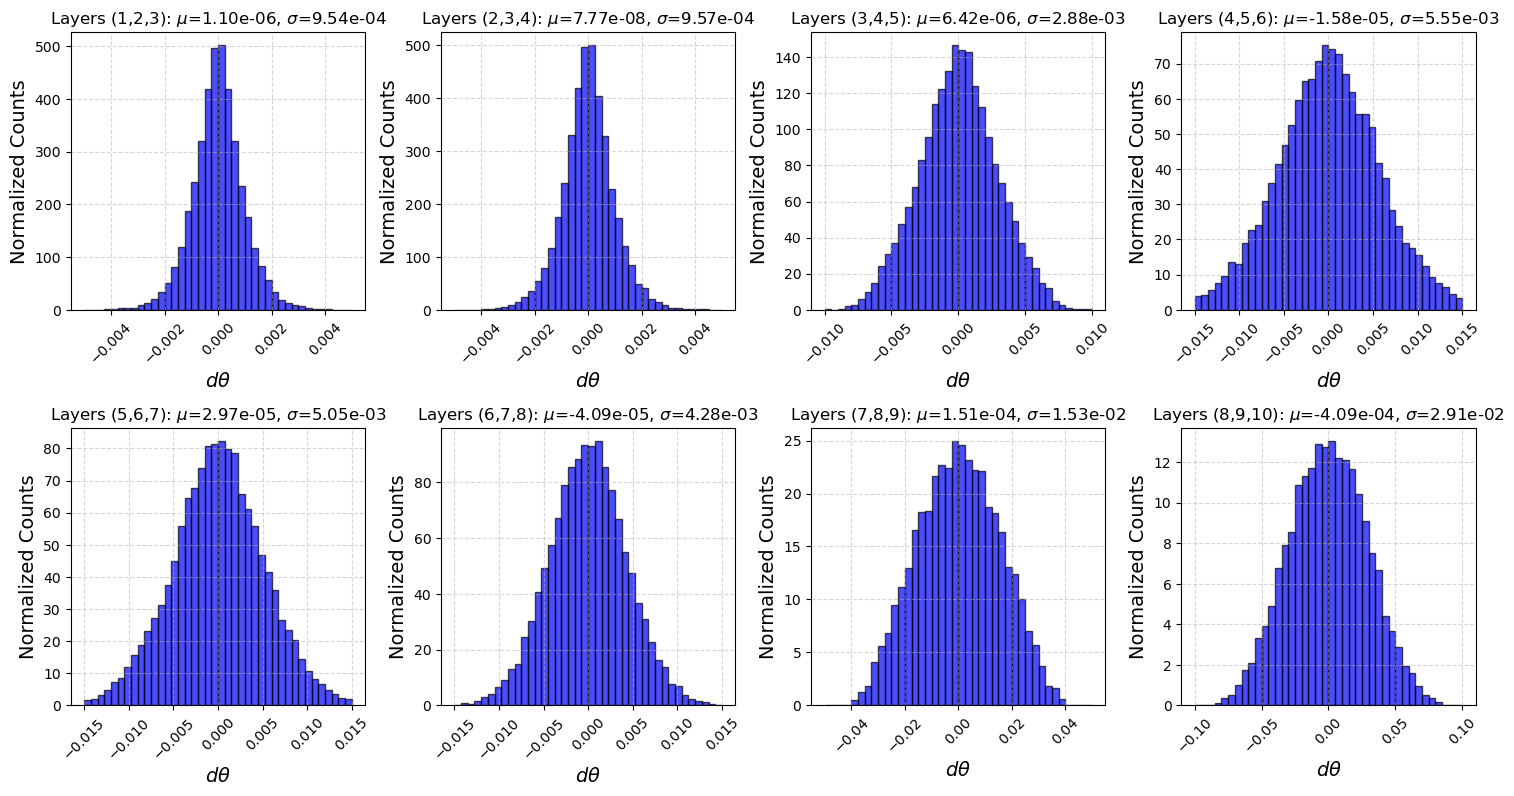

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Example dictionary with numeric keys as strings
# Replace this with your actual 'metric' dictionary
# metric = {
#     '0': np.random.normal(loc=0, scale=0.001, size=100),
#     '1': np.random.normal(loc=0.0001, scale=0.0002, size=100),
#     '2': np.random.normal(loc=-0.0001, scale=0.0003, size=100),
#     '3': np.random.normal(loc=0.0002, scale=0.0004, size=100),
#     '4': np.random.normal(loc=-0.0002, scale=0.0002, size=100),
#     '5': np.random.normal(loc=0.0003, scale=0.0001, size=100),
#     '6': np.random.normal(loc=-0.0003, scale=0.00015, size=100),
#     '7': np.random.normal(loc=0.0004, scale=0.00025, size=100)
# }

# Create a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

r1 = [0.005,0.005,0.01,0.015,0.015,0.015,0.05,0.1]
# Normalize and fit Gaussian for each dataset
for i, key in enumerate(metric.keys()):
    print(i)
    data = metric[key]  # Data from the dictionary
    ax = axes[i//4, i%4]  # Access the correct subplot

    # Fit a Gaussian (normal distribution) to the data
    
    # Plot histogram with normalization (density=True)
    r = r1[i]
    ax.hist(data, bins=40, density=True,range = (-r,r),alpha=0.7, color='blue', edgecolor='black')
    filtered_events = [event for event in data if -r <= event <= r]
    mu, sigma = norm.fit(filtered_events)


    # Generate values for the fitted Gaussian curve
    # # x = x = np.linspace(min(bins), max(bins), 100) # Adjusted to the range
    # p = norm.pdf(x, mu, sigma)

    # # Plot the fitted Gaussian curve
    # ax.plot(x, p, 'k', linewidth=2)

    # Title with fitted parameters (mu and sigma)
    ax.set_title(f'Layers ({i+1},{i+2},{i+3}): $\mu$={mu:.2e}, $\sigma$={sigma:.2e}', fontsize=12)
    ax.set_xlabel(r'$d\theta$', fontsize=14)
    ax.set_ylabel('Normalized Counts', fontsize=14)

    # Set the x-axis limits to the desired range
    # ax.set_xlim(-0.005, 0.005)

    # Grid for clarity
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', labelrotation=45)


# Adjust layout
plt.tight_layout()

plt.savefig('thesis_plots/layer_wise_dtheta.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [21]:
json_file = 'control_data/layer_wise_dkappa.json'
with open(json_file) as f:
    metric = json.load(f)

0
1
2
3
4
5
6
7


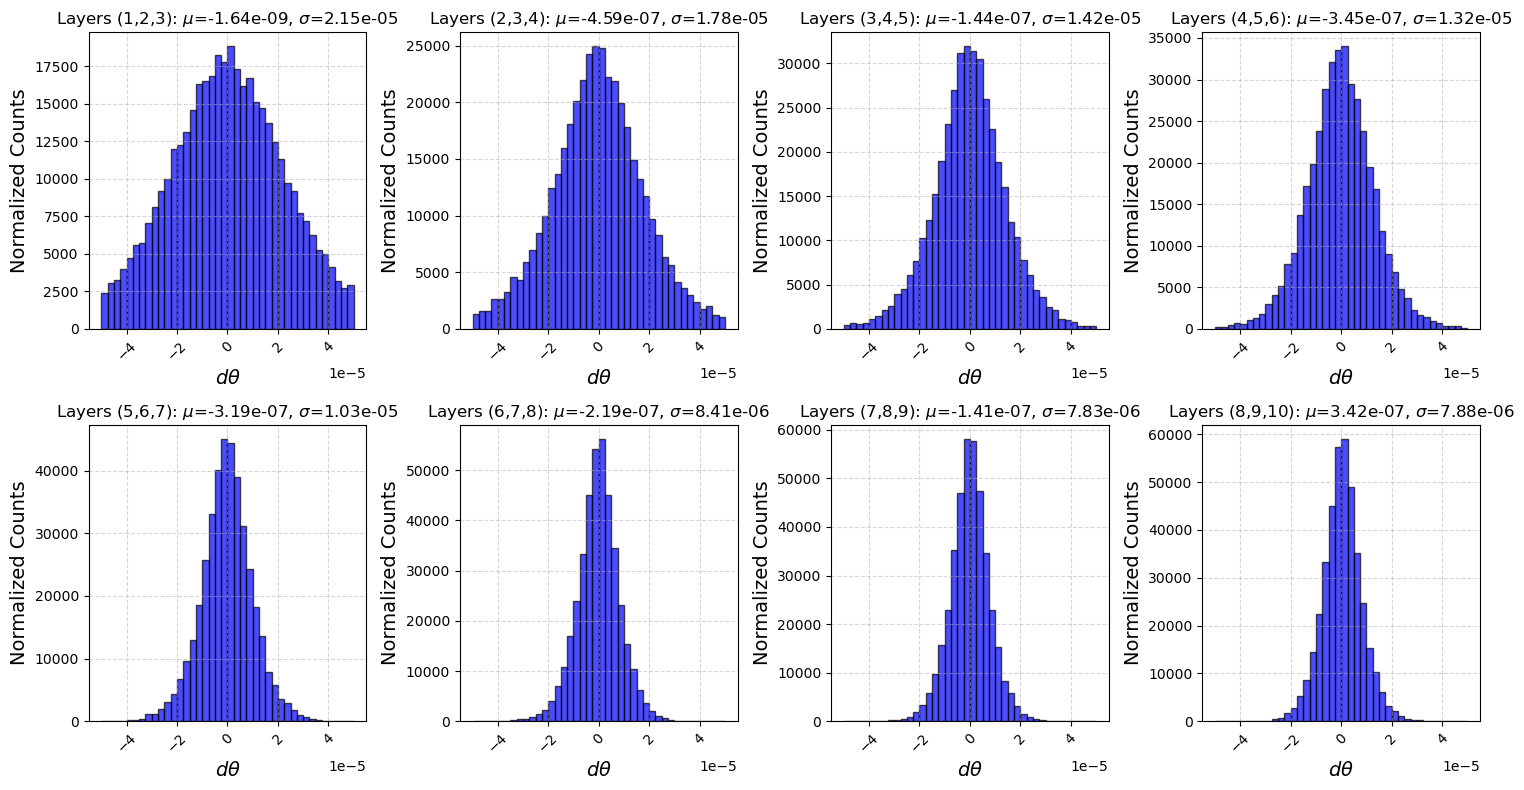

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Example dictionary with numeric keys as strings
# Replace this with your actual 'metric' dictionary
# metric = {
#     '0': np.random.normal(loc=0, scale=0.001, size=100),
#     '1': np.random.normal(loc=0.0001, scale=0.0002, size=100),
#     '2': np.random.normal(loc=-0.0001, scale=0.0003, size=100),
#     '3': np.random.normal(loc=0.0002, scale=0.0004, size=100),
#     '4': np.random.normal(loc=-0.0002, scale=0.0002, size=100),
#     '5': np.random.normal(loc=0.0003, scale=0.0001, size=100),
#     '6': np.random.normal(loc=-0.0003, scale=0.00015, size=100),
#     '7': np.random.normal(loc=0.0004, scale=0.00025, size=100)
# }

# Create a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

r = [0.005,0.005,0.01,0.015,0.015,0.015,0.05,0.1]
# Normalize and fit Gaussian for each dataset
for i, key in enumerate(metric.keys()):
    print(i)
    data = metric[key]  # Data from the dictionary
    ax = axes[i//4, i%4]  # Access the correct subplot

    # Fit a Gaussian (normal distribution) to the data
    mu, sigma = norm.fit(data)

    # Plot histogram with normalization (density=True)
    n, bins, patches = ax.hist(data, bins=40, density=True,range = (-0.5e-4,0.5e-4),alpha=0.7, color='blue', edgecolor='black')
    r = 0.5e-4
    filtered_events = [event for event in data if -r <= event <= r]
    mu, sigma = norm.fit(filtered_events)
    # Generate values for the fitted Gaussian curve
    # # x = x = np.linspace(min(bins), max(bins), 100) # Adjusted to the range
    # p = norm.pdf(x, mu, sigma)

    # # Plot the fitted Gaussian curve
    # ax.plot(x, p, 'k', linewidth=2)

    # Title with fitted parameters (mu and sigma)
    # ax.set_title(f'Layers ({i+1},{i+2},{i+3}): $\mu$={mu:.3f}, $\sigma$={sigma:.3f}', fontsize=10)
    ax.set_title(f'Layers ({i+1},{i+2},{i+3}): $\mu$={mu:.2e}, $\sigma$={sigma:.2e}', fontsize=12)

    ax.set_xlabel(r'$d\theta$', fontsize=14)
    ax.set_ylabel('Normalized Counts', fontsize=14)

    # Set the x-axis limits to the desired range
    # ax.set_xlim(-0.005, 0.005)

    # Grid for clarity
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', labelrotation=45)


# Adjust layout
plt.tight_layout()

# Save the figure in high resolution suitable for thesis
plt.savefig('thesis_plots/layer_wise_dkappa.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
stages = ['CA algorithm', '$\chi^2$ and $p$ cut','Trim(1,2,3)','Trim(8,9,10)','Track Shairing hits','$p_T$ cut']

eff = [98.5,98.1,98.1,98.1,98.1,96.3]
perfect_eff = [98.5,98.1,97.7,97.6,97.6,95.7]

purity  = [-,-,-,-,79.5,99.4]
perfect_puriy = [-,-,-,-, 79.1,98.9]

Reconstructed_tracks = [4235,2339,607,301,300,236] 

In [25]:
##calculate signal muon triplets 
###this is for differential study for muons only ...keeping pt fixed and varrying sigma_cut

from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
# from utils.track_reconstruction_metric  import*
from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:

    pdg_dict = pickle.load(f)

sigma_cut = [2,3,4,5,6,7]

event_name = 'event_array.pkl'
with open(event_name,'rb') as f:
    event_array = pickle.load(f)


# metric = {i:[] for i in sigma_cut}
# total_muons = 0
# for sigma in sigma_cut:
        
#     with open("config.yaml", "r") as f:

#         # Load and parse the YAML file
#         config = yaml.safe_load(f)
#     config['pt'] = 0.5
#     config['sigma_cut_doublets'] = sigma


#     barrel_data = get_barrel_data(config)

#     layer_files = ['z0','dtheta','dkappa']
 
#     get_layer_wise_data(layer_files,config)
signal_triplets = 0

for eno in tqdm(event_array):
    hdf,pdf = read_files(eno)

    signal_df = get_signal(hdf,pdf,config)

    if(config['signal']):
        hits_df = signal_df
    else:
        hits_df = load_barrel_df(hdf)


    total_signal_pids = signal_df['particle_id'].unique()

    ##getting particle type from pdf dataframe
    particle_signal_df = pdf[pdf.particle_id.isin(total_signal_pids)]
    pdg_pdf = particle_signal_df[particle_signal_df['particle_type'].isin([-13,13])]

    pdg_pids = pdg_pdf['particle_id'].unique()



    pdg_df = signal_df[signal_df['particle_id'].isin(pdg_pids)]

    signal_triplets += calculate_signal_triplets(pdg_df)
        # if(len(pdg_df)):
    
        #     ss = total_signal_doublets(pdg_df,barrel_data)
        #     # values = eff_and_pur(doublet_array,signal_df,barrel_data)
        #     signal_doublets += ss
        
    
print(signal_triplets)

100%|██████████| 51/51 [00:24<00:00,  2.11it/s]

963


# triplet differential study

In [34]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*

from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:

    pdg_dict = pickle.load(f)

DT  = [1,2,3,4,5,6]


event_name = 'event_array.pkl'
with open(event_name,'rb') as f:
    event_array = pickle.load(f)

def eandp(reco_doublet_arr,signal_df,barrel_data):
    signal_truth = 0
    total_doublets = 0
    
    pid = signal_df.particle_id.unique()
    for doublets in reco_doublet_arr:
        true_doublets = sum(doublets.labels)
      
        if(true_doublets):

            if(np.isin(doublets.pid1,pid)):
               signal_truth += true_doublets

        total_doublets += len(doublets.labels)

    pur = signal_truth/total_doublets 
    signal_doublets = total_signal_doublets(signal_df,barrel_data)

    eff = signal_truth/signal_doublets

    return signal_truth,signal_doublets

eff_trip = []




for dtheta in DT:
    muon_reco = 0
    muon_truth = 0
        
    with open("config.yaml", "r") as f:

        # Load and parse the YAML file
        config = yaml.safe_load(f)
    config['sigma_cut_triplets'][0] = dtheta    
    config['sigma_cut_triplets'][1] = 7
    
    barrel_data = get_barrel_data(config)

    layer_files = ['z0','dtheta','dkappa']
 
    get_layer_wise_data(layer_files,config)


    for eno in tqdm(event_array):
        hdf,pdf = read_files(eno)

        signal_df = get_signal(hdf,pdf,config)

        if(config['signal']):
            hits_df = signal_df
        else:
            hits_df = load_barrel_df(hdf)


        total_signal_pids = signal_df['particle_id'].unique()

        ##getting particle type from pdf dataframe
        particle_signal_df = pdf[pdf.particle_id.isin(total_signal_pids)]
        pdg_pdf = particle_signal_df[particle_signal_df['particle_type'].isin([-13,13])]

        pdg_pids = pdg_pdf['particle_id'].unique()



        pdg_df = signal_df[signal_df['particle_id'].isin(pdg_pids)]
        if(len(pdg_df)):
            # doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            # signal_truth,signal_doublet = eandp(doublet_array,pdg_df,barrel_data)
            doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            triplet_array,triplet_df = make_triplets(doublet_array,pdg_df,hits_df,config,barrel_data) 
            eff,pur,ts,constructed_true_triplets = calculate_triplet_metrics(triplet_array,pdg_df)
            signal_triplets = calculate_signal_triplets(pdg_df)
            

            muon_reco = muon_reco + constructed_true_triplets
            muon_truth = muon_truth + signal_triplets
    e = muon_reco/muon_truth
    eff_trip.append(e)    
with open(eff_trip_name,'wb') as f:
    pickle.dump(eff_trip,f)


100%|██████████| 51/51 [00:21<00:00,  2.35it/s]


In [54]:
DT  = [1,2,3,4,5,6]
name = 'control_data/triplet_cuts/muon_triplet_eff_dt_vary_dk_7.pkl'
with open(name,'rb') as f:
    eff_trip = pickle.load(f)

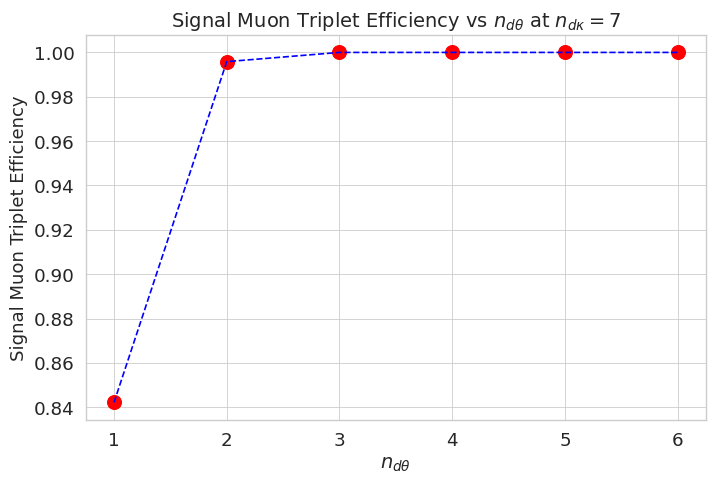

In [55]:
# Assuming PT and eff are defined appropriately
# PT = [list of PT values]
# eff = [list of corresponding efficiency values]
import matplotlib.pyplot as plt
import seaborn as sns


# Set up a scientific style plot with Seaborn
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x=DT, y=eff_trip, color='red', s=100)  # Scatterplot of PT vs eff
plt.plot(DT, eff_trip, linestyle='--', color='blue', label='Dashed Trend')  # Line plot of PT vs eff

# Customizing plot with labels and title

plt.ylabel('Signal Muon Triplet Efficiency', fontsize=13)
##add font bold
plt.xlabel(r'$n_{d\theta}$', fontsize=14,)  # Update xlabel for PT
plt.title(r'Signal Muon Triplet Efficiency vs $n_{d\theta}$ at $n_{d\kappa} = 7$', fontsize=14,)  # Update title for PT

# Add grid for scientific clarity
plt.grid(True, which='both', linestyle='-', linewidth=0.6)

# Tight layout and show plot
# plt.tight_layout()
plt.savefig('thesis_plots/muon_triplet_efficiency_vs_ndt.png', dpi=300)
plt.show()


In [51]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*

from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:

    pdg_dict = pickle.load(f)



event_name = 'event_array.pkl'
with open(event_name,'rb') as f:
    event_array = pickle.load(f)

def eandp(reco_doublet_arr,signal_df,barrel_data):
    signal_truth = 0
    total_doublets = 0
    
    pid = signal_df.particle_id.unique()
    for doublets in reco_doublet_arr:
        true_doublets = sum(doublets.labels)
      
        if(true_doublets):

            if(np.isin(doublets.pid1,pid)):
               signal_truth += true_doublets

        total_doublets += len(doublets.labels)

    pur = signal_truth/total_doublets 
    signal_doublets = total_signal_doublets(signal_df,barrel_data)

    eff = signal_truth/signal_doublets

    return signal_truth,signal_doublets

eff_trip_dk = []



DK  = [1,2,3,4,5,6]

for dkappa in DK:
    muon_reco = 0
    muon_truth = 0
        
    with open("config.yaml", "r") as f:

        # Load and parse the YAML file
        config = yaml.safe_load(f)
    config['sigma_cut_triplets'][0] = 7    
    config['sigma_cut_triplets'][1] = dkappa
    
    barrel_data = get_barrel_data(config)

    layer_files = ['z0','dtheta','dkappa']
 
    get_layer_wise_data(layer_files,config)


    for eno in tqdm(event_array):
        hdf,pdf = read_files(eno)

        signal_df = get_signal(hdf,pdf,config)

        if(config['signal']):
            hits_df = signal_df
        else:
            hits_df = load_barrel_df(hdf)


        total_signal_pids = signal_df['particle_id'].unique()

        ##getting particle type from pdf dataframe
        particle_signal_df = pdf[pdf.particle_id.isin(total_signal_pids)]
        pdg_pdf = particle_signal_df[particle_signal_df['particle_type'].isin([-13,13])]

        pdg_pids = pdg_pdf['particle_id'].unique()



        pdg_df = signal_df[signal_df['particle_id'].isin(pdg_pids)]
        if(len(pdg_df)):
            # doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            # signal_truth,signal_doublet = eandp(doublet_array,pdg_df,barrel_data)
            doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            triplet_array,triplet_df = make_triplets(doublet_array,pdg_df,hits_df,config,barrel_data) 
            eff,pur,ts,constructed_true_triplets = calculate_triplet_metrics(triplet_array,pdg_df)
            signal_triplets = calculate_signal_triplets(pdg_df)
            

            muon_reco = muon_reco + constructed_true_triplets
            muon_truth = muon_truth + signal_triplets
    e = muon_reco/muon_truth
    eff_trip_dk.append(e)    
        
eff_trip_name = 'control_data/triplet_cuts/muon_triplet_eff_dt_7_dk_vary.pkl'

with open(eff_trip_name,'wb') as f:
    pickle.dump(eff_trip_dk,f)

dk_array_name = 'control_data/triplet_cuts/dk_array.pkl'
with open(dk_array_name,'wb') as f:
    pickle.dump(DK,f)

100%|██████████| 51/51 [00:28<00:00,  1.79it/s]


In [50]:
eff_trip_dk

[1.0]

In [48]:

name = 'control_data/triplet_cuts/muon_triplet_eff_dt_7_dk_vary.pkl'
with open(name,'rb') as f:
    eff_trip_dk = pickle.load(f)

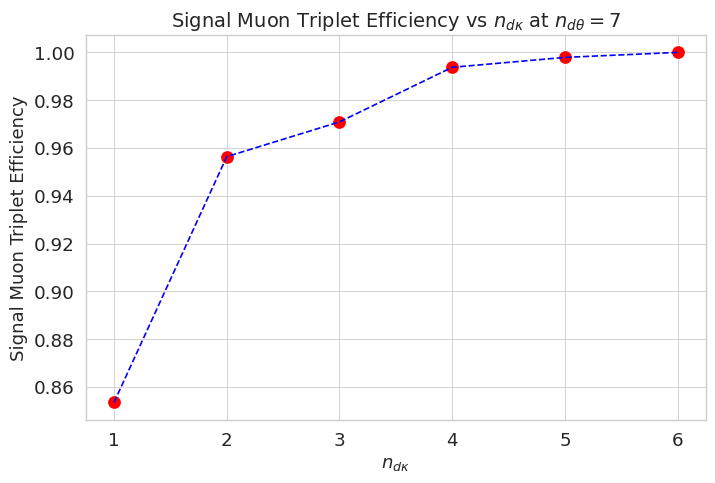

In [53]:
# Assuming PT and eff are defined appropriately
# PT = [list of PT values]
# eff = [list of corresponding efficiency values]
import matplotlib.pyplot as plt
import seaborn as sns


# Set up a scientific style plot with Seaborn
sns.set(style="whitegrid", context="paper", font_scale=1.5)
DT  = [1,2,3,4,5,6]
# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=DT, y=eff_trip_dk, color='red', s=100)  # Scatterplot of PT vs eff
plt.plot(DT, eff_trip_dk, linestyle='--', color='blue', label='Dashed Trend')  # Line plot of PT vs eff

# Customizing plot with labels and title

plt.ylabel('Signal Muon Triplet Efficiency', fontsize=13)
plt.xlabel(r'$n_{d\kappa}$', fontsize=13)  # Update xlabel for PT
plt.title(r'Signal Muon Triplet Efficiency vs $n_{d\kappa}$ at $n_{d\theta} = 7$', fontsize=14)  # Update title for PT

# Add grid for scientific clarity
plt.grid(True, which='both', linestyle='-', linewidth=0.6)

# Tight layout and show plot
# plt.tight_layout()
plt.savefig('thesis_plots/muon_triplet_efficiency_vs_ndk.png', dpi=300)
plt.show()


In [48]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*

from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:

    pdg_dict = pickle.load(f)



event_name = 'event_array.pkl'
with open(event_name,'rb') as f:
    event_array = pickle.load(f)

def eandp(reco_doublet_arr,signal_df,barrel_data):
    signal_truth = 0
    total_doublets = 0
    
    pid = signal_df.particle_id.unique()
    for doublets in reco_doublet_arr:
        true_doublets = sum(doublets.labels)
      
        if(true_doublets):

            if(np.isin(doublets.pid1,pid)):
               signal_truth += true_doublets

        total_doublets += len(doublets.labels)

    pur = signal_truth/total_doublets 
    signal_doublets = total_signal_doublets(signal_df,barrel_data)

    eff = signal_truth/signal_doublets

    return signal_truth,signal_doublets

eff_trip_dk = []



DK  = [1,2,3,4,5,6]

for i in range(1):
    muon_reco = 0
    muon_truth = 0
        
    with open("config.yaml", "r") as f:

        # Load and parse the YAML file
        config = yaml.safe_load(f)
    config['sigma_cut_triplets'][0] = 3    
    config['sigma_cut_triplets'][1] = 6
    
    barrel_data = get_barrel_data(config)

    layer_files = ['z0','dtheta','dkappa']
 
    get_layer_wise_data(layer_files,config)


    for eno in tqdm(event_array):
        hdf,pdf = read_files(eno)

        signal_df = get_signal(hdf,pdf,config)

        if(config['signal']):
            hits_df = signal_df
        else:
            hits_df = load_barrel_df(hdf)


        total_signal_pids = signal_df['particle_id'].unique()

        ##getting particle type from pdf dataframe
        particle_signal_df = pdf[pdf.particle_id.isin(total_signal_pids)]
        pdg_pdf = particle_signal_df[particle_signal_df['particle_type'].isin([-13,13])]

        pdg_pids = pdg_pdf['particle_id'].unique()



        pdg_df = signal_df[signal_df['particle_id'].isin(pdg_pids)]
        if(len(pdg_df)):
            # doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            # signal_truth,signal_doublet = eandp(doublet_array,pdg_df,barrel_data)
            doublet_array = make_all_doublets(pdg_df,barrel_data,config)

            triplet_array,triplet_df = make_triplets(doublet_array,pdg_df,hits_df,config,barrel_data) 
            eff,pur,ts,constructed_true_triplets = calculate_triplet_metrics(triplet_array,pdg_df)
            signal_triplets = calculate_signal_triplets(pdg_df)
            

            muon_reco = muon_reco + constructed_true_triplets
            muon_truth = muon_truth + signal_triplets
    e = muon_reco/muon_truth
    print(e)
    eff_trip_dk.append(e)    
        
eff_trip_name = 'control_data/triplet_cuts/muon_triplet_eff_dt_7_dk_vary.pkl'

with open(eff_trip_name,'wb') as f:
    pickle.dump(eff_trip_dk,f)

dk_array_name = 'control_data/triplet_cuts/dk_array.pkl'
with open(dk_array_name,'wb') as f:
    pickle.dump(DK,f)

100%|██████████| 51/51 [00:24<00:00,  2.07it/s]

1.0


# Triplet Metric and $\chi^2$

In [64]:
##load triplet metric

fname = 'triplet_metric.json'

with open(fname) as f:
    metric = json.load(f)
metric.keys()

dict_keys(['eff', 'pur', 'total_triplets', 'signal_triplets'])

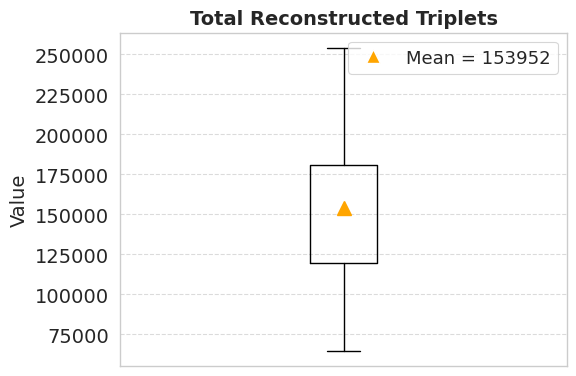

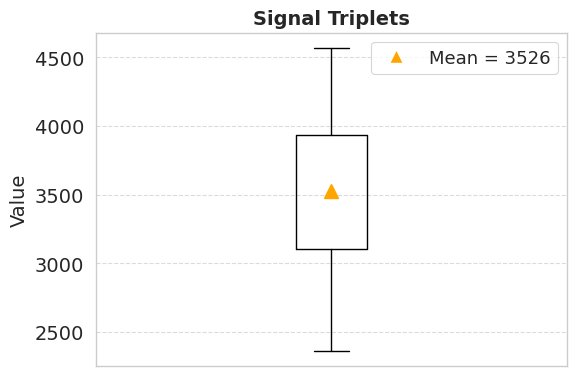

In [65]:
import os
# Titles for each plot
titles = ['Efficiency', 'Purity', 'Total Reconstructed Triplets', 'Signal Triplets']
output_dir = 'thesis_plots/triplet_metric/'
os.makedirs(output_dir, exist_ok=True)
# Create individual boxplots for each metric
for i, (key, values) in enumerate(metric.items()):


# New labels for each plot



# Create individual boxplots for each metric
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    
    # Create the boxplot
    plt.boxplot(values, showfliers=False,
                whiskerprops={'linestyle': '-', 'color': 'black'},
                boxprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'visible': False})  # Hide the median line

    mean_value = np.mean(values)  # Calculate the mean
    plt.plot(1, mean_value, marker='^', markersize=10, color='orange')  # Plot mean with triangle

    plt.title(titles[i], fontsize=14, fontweight='bold')  # Set the title with enhanced font
    plt.ylabel('Value', fontsize=14)  # Add a y-axis label for clarity
    plt.xticks([])  # Remove x-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for y-axis only for better readability
    plt.yticks(fontsize=14)

    # Add a single legend for the mean
    if i in [0,1]:

        plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
                [f'Mean = {mean_value:.3f}'], loc='upper right', fontsize=13)
    else:
        plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
    [f'Mean = {mean_value:.0f}'], loc='upper right', fontsize=13)



    plt.tight_layout()  # Adjust the layout to avoid overlap
    # Save the figure
    file_path = os.path.join(output_dir, f'trip_before_c2_{titles[i].replace(" ", "_").lower()}.png')  # Format file name
    plt.savefig(file_path, dpi=150)  # Save with 150 DPI
    plt.show()
# Close the figure after saving to avoid display


In [2]:
# load pkl files 

fname1 = 'chi2_triplet_truth.pkl'
fname2 = 'chi2_triplet_false.pkl'

with open(fname1,'rb') as f:
    chi2_truth = pickle.load(f)

with open(fname2,'rb') as f:
    chi2_false = pickle.load(f)


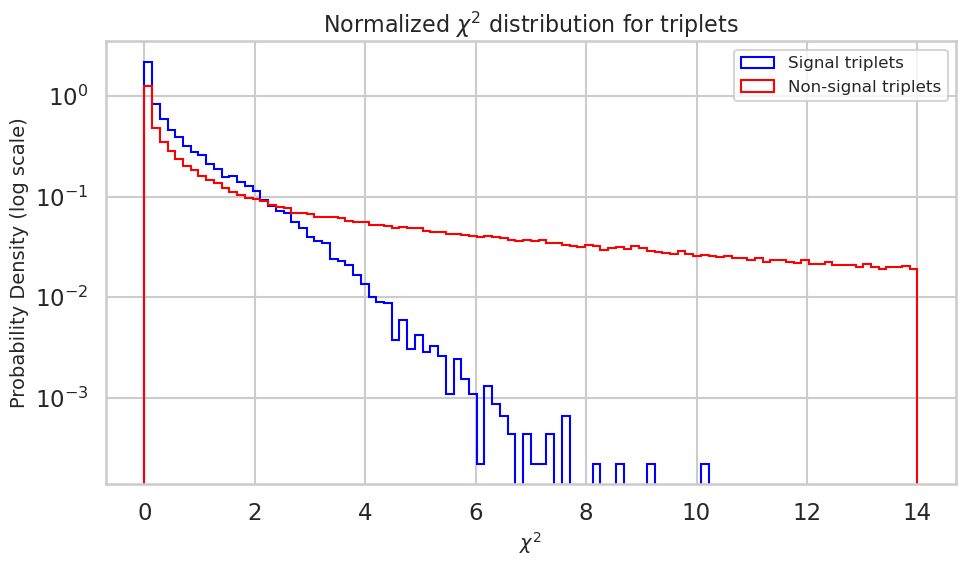

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for a scientific look
sns.set(style="whitegrid", context="talk")

# Plot the histograms with a refined aesthetic
plt.figure(figsize=(10, 6))
plt.hist(chi2_truth, bins=100, range=(0, 14), density=True, histtype='step', linewidth=1.5, color="blue", label=r'Signal triplets')
plt.hist(chi2_false, bins=100, range=(0, 14), density=True, histtype='step', linewidth=1.5, color="red", label=r'Non-signal triplets')
plt.yscale('log')

# Labeling and title with scientific formatting
plt.xlabel(r'$\chi^2$ ', fontsize=14)
plt.ylabel('Probability Density (log scale)', fontsize=14)
plt.title(r'Normalized $\chi^2$ distribution for triplets', fontsize=16)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig('thesis_plots/normalized_chi2_triplet.png', dpi=300)
plt.show()


## triplet metric after chi square --

In [31]:
fname = 'triplet_metric_after_chi2.json'

with open(fname) as f:
    metric = json.load(f)
metric.keys()

dict_keys(['eff', 'pur', 'total_triplets', 'signal_triplets'])

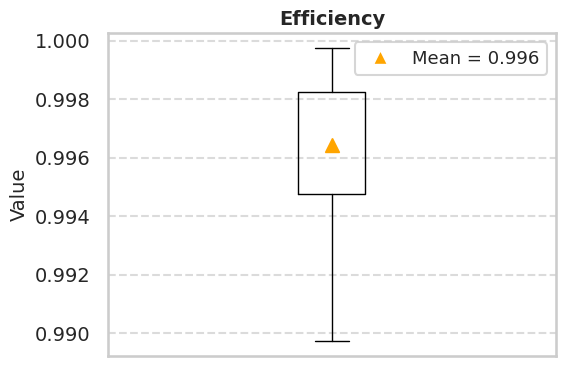

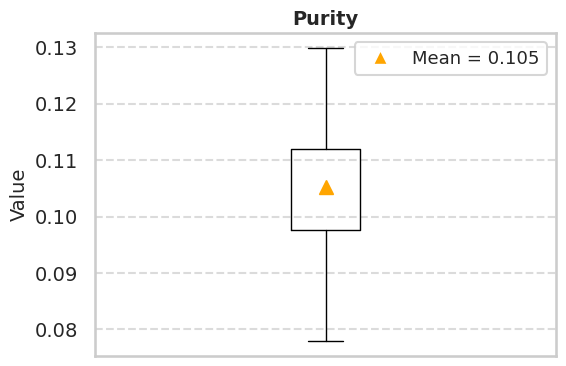

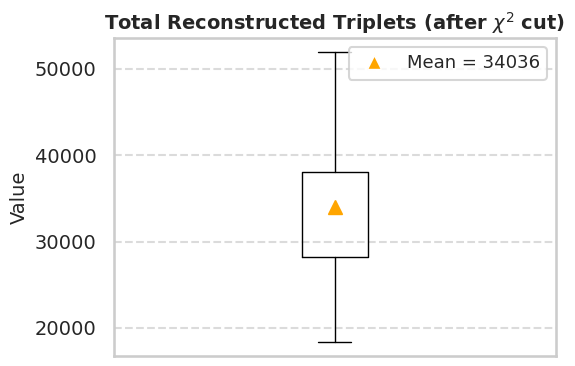

In [32]:
import os
# Titles for each plot
titles = ['Efficiency', 'Purity', 'Total Reconstructed Triplets (after $\chi^2$ cut)']
output_dir = 'thesis_plots/triplet_metric/'
os.makedirs(output_dir, exist_ok=True)
# Create individual boxplots for each metric
for i, (key, values) in enumerate(metric.items()):
    if i != 3:  # Skip index 3 if that's intentional

# New labels for each plot



    # Create individual boxplots for each metric
        plt.figure(figsize=(6, 4))  # Create a new figure for each plot
        
        # Create the boxplot
        plt.boxplot(values, showfliers=False,
                    whiskerprops={'linestyle': '-', 'color': 'black'},
                    boxprops={'color': 'black'},
                    capprops={'color': 'black'},
                    medianprops={'visible': False})  # Hide the median line

        mean_value = np.mean(values)  # Calculate the mean
        plt.plot(1, mean_value, marker='^', markersize=10, color='orange')  # Plot mean with triangle

        plt.title(titles[i], fontsize=14, fontweight='bold')  # Set the title with enhanced font
        plt.ylabel('Value', fontsize=14)  # Add a y-axis label for clarity
        plt.xticks([])  # Remove x-axis ticks
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for y-axis only for better readability
        plt.yticks(fontsize=14)

        # Add a single legend for the mean
        if i in [0,1]:

            plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
                    [f'Mean = {mean_value:.3f}'], loc='upper right', fontsize=13)
        else:
            plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10)],
        [f'Mean = {mean_value:.0f}'], loc='upper right', fontsize=13)



        plt.tight_layout()  # Adjust the layout to avoid overlap
        # Save the figure
        if i in [0,1]:

            file_path = os.path.join(output_dir, f'trip_after_c2_{titles[i].replace(" ", "_").lower()}.png')  # Format file name
        else:
            file_path = os.path.join(output_dir, f'trip_after_c2_total_reconstructed_triplets.png')
        plt.savefig(file_path, dpi=150)  # Save with 150 DPI
        plt.show()
  # Close the figure after saving to avoid display


In [72]:

ppdf

particle_id  particle_type        vx        vy         vz  \
0        4503668346847232           -211  0.040512  0.027287    6.03927   
6        4504355541614592           -211  0.040512  0.027287    6.03927   
7        4504424261091328            321  0.040512  0.027287    6.03927   
59       4510746452951040            211  0.040512  0.027287    6.03927   
78       4512533159346176            211  0.040512  0.027287    6.03927   
...                   ...            ...       ...       ...        ...   
12553  981786368034209792            211 -0.019494 -0.021313  174.45200   
12588  981791384556011520            211 -0.019494 -0.021313  174.45200   
12589  981791521994964992            211 -0.019494 -0.021313  174.45200   
12590  981791590714441728           -211 -0.019494 -0.021313  174.45200   
12665  981804509976068096           -321 -0.077258 -0.031452  174.40200   

             px        py        pz  q  nhits    radius        pt  
0     -0.505992 -1.595230  1.728730 -1     11  0.048845  1.673555  
6      1.113530  0.179386 -0.568658 -1     10  0.048845  1.127887  
7      1.052700  0.027287  0.131887  1     15  0.048845  1.053054  
59     1.602340 -0.204271 -1.022720  1     12  0.048845  1.615308  
78    -0.907076 -0.963479 -0.734210  1     13  0.048845  1.323283  
...         ...       ...       ... ..    ...       ...       ...  
12553  1.054150  0.415576  0.139182  1     14  0.028883  1.133109  
12588  0.301843 -1.000380 -1.028890  1     11  0.028883  1.044926  
12589 -0.101355 -1.397840 -1.002540  1     11  0.028883  1.401510  
12590 -0.871515 -1.935490 -2.342090 -1     12  0.028883  2.122654  
12665 -2.166440 -0.082725 -1.768100 -1     12  0.083415  2.168019  

[285 rows x 12 columns]

(array([2700., 2520., 3330., 2700., 2610., 2880., 2250., 2250., 1800.,
        2610.]),
 array([-0.9526174 , -0.76537155, -0.57812569, -0.39087984, -0.20363399,
        -0.01638813,  0.17085772,  0.35810358,  0.54534943,  0.73259529,
         0.91984114]),
 <BarContainer object of 10 artists>)

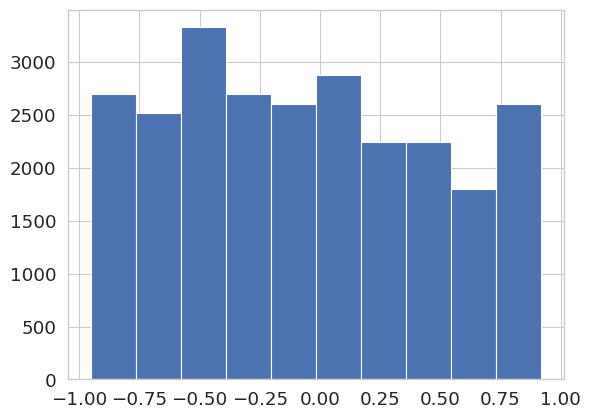

In [1]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
from utils.track_reconstruction_metric_triplet_level  import*
from utils.track_reconstruction_metric_hit_level  import*
from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*
class generated_tracks:
    pass

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:
    pdg_dict = pickle.load(f)
with open("config.yaml", "r") as f:

    # Load and parse the YAML file
    config = yaml.safe_load(f)
barrel_data = get_barrel_data(config)
config['sigma_cut'] = 3
layer_files = ['z0','dtheta','dkappa']
get_layer_wise_data(layer_files,config)
def fname(eno):


    triplet_arr_fname  = f'generated_tracks/triplets/chi2_7_triplet_arr{eno}.pkl'
    triplet_df_fname  = f'generated_tracks/triplets/chi2_7_triplet_df{eno}.pkl'
    ca_fname = f'generated_tracks/ca_class_eno_{eno}.pkl'
    # triplet_fname = stage_dir+f'{track_segments}_eventno_'+str(eno)+'_signal_'+str(signal)+'_z0_'+str(z0)+'_pt_'+str(pt)+'.pkl'
    return triplet_arr_fname,triplet_df_fname,ca_fname


def load_triplets(eno):
    triplet_arr_fname,triplet_df_fname,_ = fname(eno)
    with open(triplet_arr_fname,'rb') as f:
        triplet_arr = pickle.load(f)
    with open(triplet_df_fname,'rb') as f:
        triplet_df = pickle.load(f)
    config['chi_square_cut'] = 6
    return triplet_array_after_chi2_cut(triplet_arr,triplet_df,config)    



def load_ca(eno):
    _,_,ca_fname = fname(eno)
    with open(ca_fname,'rb') as f:
        ca = pickle.load(f)
    return ca



(array([2700., 2520., 3330., 2700., 2610., 2880., 2250., 2250., 1800.,
        2610.]),
 array([-0.9526174 , -0.76537155, -0.57812569, -0.39087984, -0.20363399,
        -0.01638813,  0.17085772,  0.35810358,  0.54534943,  0.73259529,
         0.91984114]),
 <BarContainer object of 10 artists>)

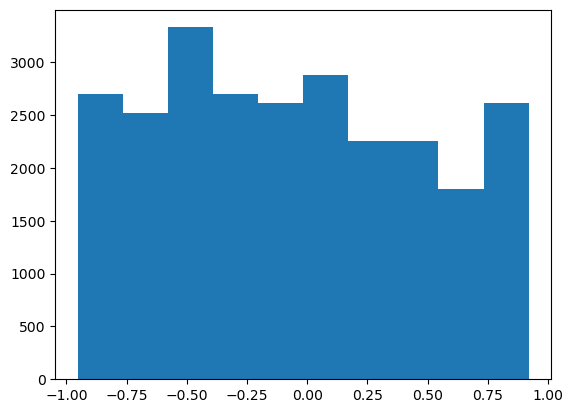

In [2]:
name = 'em_plots/eta_true.pkl'
with open(name,'rb') as f:
    eta_true = pickle.load(f)
plt.hist(eta_true) 

In [14]:
curvature =  []
base = "generated_tracks/triplet_level/inside_out/"
for eno in tqdm(range(90)):
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)
    triplet_arr_chi2,triplet_df_chi2 = load_triplets(eno)

    class_name = base + f'event_{eno}.pkl'
    with open(class_name,'rb') as f:
        track_class = pickle.load(f)


    track_collection = track_class.track_after_second_trimming

    for track in track_collection:
        triplet_object_array = []
        hits = []
        for iter,element in enumerate(track):
            iter  = 7-iter
            index_layer = np.where(triplet_df_chi2 == iter)[0]

            triplet_element = triplet_arr_chi2[index_layer][element]

            triplet_object_array.append(triplet_element)
            hits.extend(triplet_element.hitids)


        triplet_object_array.reverse()

        gttf_class = GTTF(triplet_object_array)
        curvature.append(gttf_class.C3D_glob)

100%|██████████| 90/90 [05:01<00:00,  3.35s/it]


In [48]:
theta_rz_plane  =  []
base = "generated_tracks/triplet_level/inside_out/"
for eno in tqdm(range(90)):
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)
    triplet_arr_chi2,triplet_df_chi2 = load_triplets(eno)

    class_name = base + f'event_{eno}.pkl'
    with open(class_name,'rb') as f:
        track_class = pickle.load(f)


    track_collection = track_class.track_after_second_trimming

    for track in track_collection:
        triplet_object_array = []
        hits = []
        for iter,element in enumerate(track):
            iter  = 7-iter
            index_layer = np.where(triplet_df_chi2 == iter)[0]

            triplet_element = triplet_arr_chi2[index_layer][element]

            triplet_object_array.append(triplet_element)
            hits.extend(triplet_element.hitids)
        hits = np.unique(hits)
        hits = np.flip(hits)

        df = hits_df[hits_df.hit_id.isin(hits[0:2])]
        z1 = df['z'].values[0]
        z2 = df['z'].values[1]
        r1 = df['r'].values[0]
        r2 = df['r'].values[1]
        dr = r2-r1
        dz = z2-z1
        theta  = np.abs(np.arctan2(dr,dz))
        theta_rz_plane.append(theta)

100%|██████████| 90/90 [04:27<00:00,  2.98s/it]


(array([2.6937e+04, 1.0100e+02, 2.5000e+01, 8.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.63639785,  13.83340965,  27.03042146,  40.22743327,
         53.42444508,  66.62145689,  79.81846869,  93.0154805 ,
        106.21249231, 119.40950412, 132.60651592]),
 <BarContainer object of 10 artists>)

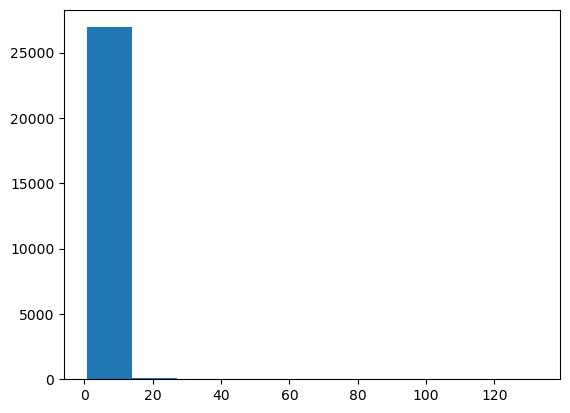

In [49]:
measured_pt = momentum*np.sin(theta_rz_plane)
plt.hist(measured_pt)

In [26]:
curvature = np.array(curvature)
print(len(curvature))

momentum = (0.3/1000)*2/np.abs(curvature)



27075


In [29]:
pt_truth = []

for eno in tqdm(range(90)):
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)

    signal_pids = signal_df.particle_id.unique()
    pt_array = pdf[pdf.particle_id.isin(signal_pids)]['pt'].values

    pt_truth.extend(pt_array)

100%|██████████| 90/90 [00:43<00:00,  2.08it/s]


In [30]:
truth_momentum = 'em_plots/truth_momentum.pkl'
with open(truth_momentum,'wb') as f:
    pickle.dump(pt_truth,f)

In [27]:
reco_momentum_name = 'em_plots/reco_momentum.pkl'
with open(reco_momentum_name,'wb') as f:
    pickle.dump(momentum,f)

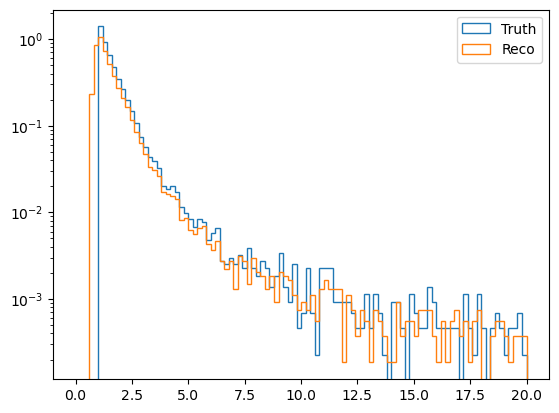

In [70]:
plt.hist(pt_truth,bins=100,range = (0,20),histtype = 'step',label = 'Truth',density = True)
plt.hist(measured_pt,bins=100,range = (0,20),histtype = 'step',label = 'Reco',density =    True)
plt.hist
plt.yscale('log')
plt.legend()
plt.show()

In [52]:
measured_pt_name = 'em_plots/measured_pt.pkl'
with open(measured_pt_name,'wb') as f:
    pickle.dump(measured_pt,f)

In [69]:
efficiency = []
purity = []
perfect_efficiency = []


base = "generated_tracks/triplet_level/inside_out/"
for eno in tqdm(range(90)):
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)
    triplet_arr_chi2,triplet_df_chi2 = load_triplets(eno)

    class_name = base + f'event_{eno}.pkl'
    with open(class_name,'rb') as f:
        track_class = pickle.load(f)

    track_collection = track_class.track_after_second_trimming 
    theta_array = []
    momentum_array = []
    sigma_p_array  = [] 
    for track in track_collection:
        triplet_object_array = []
        hits = []
        for iter,element in enumerate(track):
            iter  = 7-iter
            index_layer = np.where(triplet_df_chi2 == iter)[0]

            triplet_element = triplet_arr_chi2[index_layer][element]

            triplet_object_array.append(triplet_element)
            hits.extend(triplet_element.hitids)
        hits = np.unique(hits)
        hits = np.flip(hits)

        df = hits_df[hits_df.hit_id.isin(hits[0:2])]
        z1 = df['z'].values[0]
        z2 = df['z'].values[1]
        r1 = df['r'].values[0]
        r2 = df['r'].values[1]
        dr = r2-r1
        dz = z2-z1
        theta  = np.abs(np.arctan2(dr,dz))

        theta_array.append(np.sin(theta))
        
        gttf_class = GTTF(triplet_object_array)
        curvature= gttf_class.C3D_glob

        momentum = (0.3/1000)*2/np.abs(curvature)
        momentum_array.append(momentum)

        sigma_k = gttf_class.sigma_C3D_glob
        sigma_p = (0.3/1000)*2*sigma_k/(np.abs(curvature)**2)

        sigma_p_array.append(sigma_p)


    momentum_array = np.array(momentum_array)
    theta_array = np.array(theta_array)

    sigma_p_array = np.array(sigma_p_array)
    

    pt = momentum_array*theta_array

    sigma_pt = pt*sigma_p_array

    pev = pt-sigma_pt

    index = np.where(pev>=1)
    
    new_tracks = np.array(track_collection)[index]

    eff,pur,perfect_eff,_ = track_reco_meric(new_tracks,triplet_arr_chi2,triplet_df_chi2,hits_df,signal_df)
    print('perfect_eff = ',perfect_eff)
    print('purity = ',pur,'\n')
    
    efficiency.append(eff)
    purity.append(pur)
    perfect_efficiency.append(perfect_efficiency)



       

    


  1%|          | 1/90 [00:05<07:42,  5.19s/it]

perfect_eff =  0.9333333333333333
purity =  1.0 



  2%|▏         | 2/90 [00:09<07:07,  4.86s/it]

perfect_eff =  0.9356060606060606
purity =  0.9959839357429718 



  3%|▎         | 3/90 [00:14<06:49,  4.70s/it]

perfect_eff =  0.9403508771929825
purity =  0.9926470588235294 



  4%|▍         | 4/90 [00:17<05:59,  4.18s/it]

perfect_eff =  0.9547738693467337
purity =  0.9947916666666666 



  6%|▌         | 5/90 [00:21<05:53,  4.16s/it]

perfect_eff =  0.9190283400809717
purity =  0.9956709956709957 



  7%|▋         | 6/90 [00:25<05:33,  3.97s/it]

perfect_eff =  0.9244444444444444
purity =  0.9952830188679245 



  8%|▊         | 7/90 [00:29<05:40,  4.10s/it]

perfect_eff =  0.9652509652509652
purity =  1.0 



  9%|▉         | 8/90 [00:35<06:07,  4.48s/it]

perfect_eff =  0.9467680608365019
purity =  1.0 



 10%|█         | 9/90 [00:40<06:18,  4.68s/it]

perfect_eff =  0.927797833935018
purity =  0.9961977186311787 



 11%|█         | 10/90 [00:45<06:18,  4.73s/it]

perfect_eff =  0.9576923076923077
purity =  1.0 



 12%|█▏        | 11/90 [00:48<05:49,  4.42s/it]

perfect_eff =  0.953307392996109
purity =  0.9959677419354839 



 13%|█▎        | 12/90 [00:53<05:59,  4.61s/it]

perfect_eff =  0.94921875
purity =  1.0 



 14%|█▍        | 13/90 [00:57<05:36,  4.36s/it]

perfect_eff =  0.9263565891472868
purity =  1.0 



 16%|█▌        | 14/90 [01:03<06:02,  4.77s/it]

perfect_eff =  0.953405017921147
purity =  1.0 



 17%|█▋        | 15/90 [01:06<05:17,  4.23s/it]

perfect_eff =  0.9515418502202643
purity =  0.9954128440366973 



 18%|█▊        | 16/90 [01:08<04:36,  3.73s/it]

perfect_eff =  0.9147727272727273
purity =  0.9819277108433735 



 19%|█▉        | 17/90 [01:13<04:41,  3.86s/it]

perfect_eff =  0.9559471365638766
purity =  1.0 



 20%|██        | 18/90 [01:18<05:04,  4.23s/it]

perfect_eff =  0.9394904458598726
purity =  0.9966442953020134 



 21%|██        | 19/90 [01:21<04:44,  4.00s/it]

perfect_eff =  0.9674418604651163
purity =  0.9904761904761905 



 22%|██▏       | 20/90 [01:24<04:13,  3.62s/it]

perfect_eff =  0.9112426035502958
purity =  1.0 



 23%|██▎       | 21/90 [01:26<03:47,  3.29s/it]

perfect_eff =  0.9685863874345549
purity =  1.0 



 24%|██▍       | 22/90 [01:30<03:55,  3.46s/it]

perfect_eff =  0.9543568464730291
purity =  1.0 



 26%|██▌       | 23/90 [01:34<03:51,  3.46s/it]

perfect_eff =  0.9166666666666666
purity =  1.0 



 27%|██▋       | 24/90 [01:38<04:09,  3.78s/it]

perfect_eff =  0.9575971731448764
purity =  0.9963369963369964 



 28%|██▊       | 25/90 [01:42<04:12,  3.89s/it]

perfect_eff =  0.9375
purity =  1.0 



 29%|██▉       | 26/90 [01:46<04:10,  3.92s/it]

perfect_eff =  0.9444444444444444
purity =  1.0 



 30%|███       | 27/90 [01:50<03:57,  3.76s/it]

perfect_eff =  0.93717277486911
purity =  1.0 



 30%|███       | 27/90 [01:53<04:25,  4.21s/it]


KeyboardInterrupt: 

In [24]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
from utils.track_reconstruction_metric_triplet_level  import*
from utils.track_reconstruction_metric_hit_level  import*
from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*
class generated_tracks:
    pass

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:
    pdg_dict = pickle.load(f)
with open("config.yaml", "r") as f:

    # Load and parse the YAML file
    config = yaml.safe_load(f)
barrel_data = get_barrel_data(config)
config['sigma_cut'] = 3
layer_files = ['z0','dtheta','dkappa']
get_layer_wise_data(layer_files,config)
def fname(eno):


    triplet_arr_fname  = f'generated_tracks/triplets/chi2_7_triplet_arr{eno}.pkl'
    triplet_df_fname  = f'generated_tracks/triplets/chi2_7_triplet_df{eno}.pkl'
    ca_fname = f'generated_tracks/ca_class_eno_{eno}.pkl'
    # triplet_fname = stage_dir+f'{track_segments}_eventno_'+str(eno)+'_signal_'+str(signal)+'_z0_'+str(z0)+'_pt_'+str(pt)+'.pkl'
    return triplet_arr_fname,triplet_df_fname,ca_fname


def load_triplets(eno):
    triplet_arr_fname,triplet_df_fname,_ = fname(eno)
    with open(triplet_arr_fname,'rb') as f:
        triplet_arr = pickle.load(f)
    with open(triplet_df_fname,'rb') as f:
        triplet_df = pickle.load(f)
    config['chi_square_cut'] = 6
    return triplet_array_after_chi2_cut(triplet_arr,triplet_df,config)    



def load_ca(eno):
    _,_,ca_fname = fname(eno)
    with open(ca_fname,'rb') as f:
        ca = pickle.load(f)
    return ca



metric_after_ptc2_cut = {'eff':[],'pur':[],'total_tracks':[],'perfect_eff':[]}
metric_after_first_trim = {'eff':[],'pur':[],'total_tracks':[],'perfect_eff':[]}
metric_after_second_trim = {'eff':[],'pur':[],'total_tracks':[],'perfect_eff':[]}
final_metric_hit = {'eff':[],'pur':[],'total_tracks':[],'perfect_eff':[]}

# chi2_dataframe = pd.DataFrame(columns=['event_no','chi2_global','signal_label'])
base = "generated_tracks/triplet_level/inside_out/"

for eno in tqdm([10,12,14]):


    track_class = generated_tracks()
    class_name = base + f'event_{eno}.pkl'

    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)

    ca_class = load_ca(eno)

    filtered_triplet_arr,filtered_triplet_df = load_triplets(eno)

    
    # eff,pur,per_eff,track_collection_hits = track_reco_meric(ca_class.track_collection,
    #              filtered_triplet_arr,
    #              filtered_triplet_df,
    #              hits_df,
    #              signal_df)



    # print('CA reco ','eff = ',eff,'pur = ',pur,'perfect_eff = ',per_eff,'\n')  
  
    
    ###############################################################################
    label_after_ptc2_cut = []
    chi2_after_ptc2_cut = []
    index_after_ptc2_cut = []
    

    ca_class.pt = ca_class.momentum_array*(np.sin(ca_class.theta_array))

    ca_class.sigma_pt = ca_class.pt*ca_class.sigma_p_array

    ca_class.pt_minus_sigma = ca_class.pt-1*ca_class.sigma_pt




    for i in range(len(ca_class.label)):
        if(ca_class.pt_minus_sigma[i]>=1 and ca_class.chi2_gttf_array[i]<45):
            index_after_ptc2_cut.append(i)
            label_after_ptc2_cut.append(ca_class.label[i])
            chi2_after_ptc2_cut.append(ca_class.chi2_gttf_array[i])
    
    tracks_after_ptc2_cut = []

    for iter in index_after_ptc2_cut:
        tracks_after_ptc2_cut.append(ca_class.track_collection[iter])

    track_class.label_after_ptc2_cut = label_after_ptc2_cut
    track_class.chi2_after_ptc2_cut = chi2_after_ptc2_cut
    track_class.tracks_after_ptc2_cut = tracks_after_ptc2_cut

    eff,pur,per_eff,track_collection_hits = track_reco_meric(tracks_after_ptc2_cut,
                 filtered_triplet_arr,
                 filtered_triplet_df,
                 hits_df,
                 signal_df)



 
##################################################################################
    metric_after_ptc2_cut['eff'].append(eff)
    metric_after_ptc2_cut['pur'].append(pur)
    metric_after_ptc2_cut['total_tracks'].append(len(tracks_after_ptc2_cut))
    metric_after_ptc2_cut['perfect_eff'].append(per_eff)

    print("metric after ptc2 cut",eff,pur,per_eff)
    



    ##################################################################################

    track_after_first_trimming,chi2_global_after_first_trimming,label_after_first_trimming =  disconnecting_the_graph(tracks_after_ptc2_cut,np.array(chi2_after_ptc2_cut),label_after_ptc2_cut,-1)
    track_class.track_after_first_trimming = track_after_first_trimming
    track_class.chi2_after_first_trimming = chi2_global_after_first_trimming
    track_class.label_after_first_trimming = label_after_first_trimming

    eff,pur,perfect_eff,total_tracks = track_reco_meric(track_after_first_trimming,filtered_triplet_arr,
                                                        filtered_triplet_df,hits_df,signal_df)

    print("metric after first trimming")
    print(eff,pur,perfect_eff)
    metric_after_first_trim['eff'].append(eff)
    metric_after_first_trim['pur'].append(pur)
    metric_after_first_trim['total_tracks'].append(len(track_after_first_trimming))
    metric_after_first_trim['perfect_eff'].append(perfect_eff)

    ####################################################################################################



    track_after_second_trimming,chi2_global_after_second_trimming,label_after_second_trimming =  disconnecting_the_graph(track_after_first_trimming,np.array(chi2_global_after_first_trimming),label_after_first_trimming,0)
    track_class.track_after_second_trimming = track_after_second_trimming
    track_class.chi2_after_second_trimming = chi2_global_after_second_trimming

    eff,pur,perfect_eff,total_tracks = track_reco_meric(track_after_second_trimming,filtered_triplet_arr,
                                                        filtered_triplet_df,hits_df,signal_df)

    print("metric after second trimming")
    print(eff,pur,perfect_eff)
    metric_after_second_trim['eff'].append(eff)
    metric_after_second_trim['pur'].append(pur)
    metric_after_second_trim['total_tracks'].append(len(track_after_second_trimming))
    metric_after_second_trim['perfect_eff'].append(perfect_eff)


    ##############################################################################################



    final_track_hit,final_chi2_hit = track_sharing_hits(total_tracks,np.array(chi2_global_after_second_trimming))
    eff,pur,per_eff = track_metric_hit_level(final_track_hit,hits_df,signal_df)


    track_class.final_track_hit = final_track_hit
    track_class.final_chi2_hit = final_chi2_hit

    print("final track metric at the hit level")
    print(eff,pur,per_eff)

    final_metric_hit['eff'].append(eff)
    final_metric_hit['pur'].append(pur)
    final_metric_hit['total_tracks'].append(len(final_track_hit))
    final_metric_hit['perfect_eff'].append(perfect_eff)

   

    # with open(class_name,'wb') as f:
    #     pickle.dump(track_class,f)


##save the chi2_dataframe

# ##saving all metrics from preveious steps
# metric_after_ptc2_cut_df = pd.DataFrame(metric_after_ptc2_cut)
# metric_after_first_trim_df = pd.DataFrame(metric_after_first_trim)
# metric_after_second_trim_df = pd.DataFrame(metric_after_second_trim)
# final_metric_hit_df = pd.DataFrame(final_metric_hit)

# metric_after_ptc2_cut_df.to_csv('generated_tracks/triplet_level/inside_out/metric_after_ptc2_cut.csv',index=False)
# metric_after_first_trim_df.to_csv('generated_tracks/triplet_level/inside_out/metric_after_first_trim.csv',index=False)
# metric_after_second_trim_df.to_csv('generated_tracks/triplet_level/inside_out/metric_after_second_trim.csv',index=False)
# final_metric_hit_df.to_csv('generated_tracks/triplet_level/inside_out/final_metric_hit.csv',index=False)

  0%|          | 0/3 [00:00<?, ?it/s]

metric after ptc2 cut 0.9649805447470817 0.10424548129466163 0.9649805447470817
metric after first trimming
0.9649805447470817 0.4652908067542214 0.9571984435797666
metric after second trimming
0.9649805447470817 0.9959839357429718 0.9571984435797666


 33%|███▎      | 1/3 [00:09<00:19,  9.85s/it]

final track metric at the hit level
0.9649805447470817 0.9959839357429718 0.9571984435797666
metric after ptc2 cut 0.9496124031007752 0.12894736842105264 0.9496124031007752
metric after first trimming
0.9496124031007752 0.47024952015355087 0.9418604651162791
metric after second trimming
0.9496124031007752 1.0 0.9341085271317829


 67%|██████▋   | 2/3 [00:18<00:09,  9.14s/it]

final track metric at the hit level
0.9457364341085271 1.0 0.9341085271317829
metric after ptc2 cut 0.960352422907489 0.1261574074074074 0.960352422907489
metric after first trimming
0.960352422907489 0.5 0.9559471365638766
metric after second trimming
0.960352422907489 0.990909090909091 0.9559471365638766


100%|██████████| 3/3 [00:25<00:00,  8.43s/it]

final track metric at the hit level
0.960352422907489 0.9954337899543378 0.9559471365638766


In [7]:
chi2_truth = []
chi2_false = []

for iter in range(len(ca_class.label)):
    if(ca_class.label[iter]):
        chi2_truth.append(ca_class.chi2_gttf_array[iter])
    else:
        chi2_false.append(ca_class.chi2_gttf_array[iter])